# Hough Lines

### Import resources and display the image

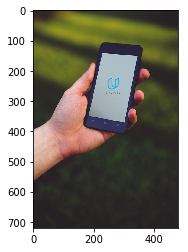

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('images/phone.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Perform edge detection

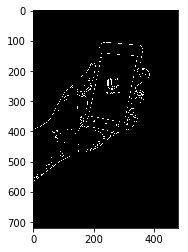

In [3]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

### Find lines using a Hough transform

5
x1: 303 - y1: 369 - x2: 345 - y2:152
x1: 184 - y1: 349 - x2: 227 - y2:150
x1: 230 - y1: 142 - x2: 344 - y2:152
x1: 185 - y1: 349 - x2: 301 - y2:371
x1: 302 - y1: 371 - x2: 344 - y2:156


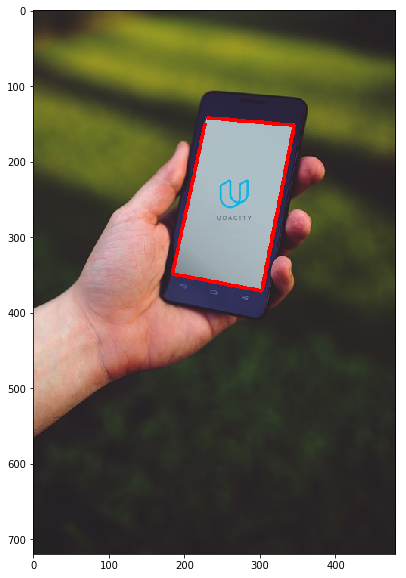

In [43]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on.
# rho and theta define the resolution of the detection
rho = 1
theta = 1* np.pi/180 #1 degree 
# Minimum threshold to detect a line.
# It's the minimum number of times that a particular intersection appears in the Hough space.
threshold = 60 
min_line_length = 100 # the minimum line length
max_line_gap = 5     # gap between discontinuous line segments.

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
# Now this function returns all the detected Hough lines.
# Each line is actually an array of four points, x1 y1 and x2 y2.
# These are just the two endpoints of each line.
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

print(len(lines))

# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    x1,y1,x2,y2 = line[0]        
    print("x1: {} - y1: {} - x2: {} - y2:{}".format(x1, y1, x2, y2))
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0), 3)

plt.figure(figsize=(15,10))
plt.imshow(line_image)

# WHERE IS THE 5TH LINE? (First and last very very similar)